In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import torch

/home/kim/eccv/.conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Take cleaned data set

- Withhold some lines
- Distretise to grid to reduce num of data

In [3]:
# byrd_bedmap_points = pd.read_csv('/home/kim/ice_thickness/data/byrd_200km.csv')
# clean has 457,451 rows, raw has 465,760 rows
byrd_bedmap_points_clean = pd.read_csv('/home/kim/ice_thickness/data/byrd_bedmap_points_clean.csv')

In [4]:
byrd_bedmap_points_clean.value_counts("source")

source
NASA_2011_ICEBRIDGE_AIR_BM2.csv    315428
UTIG_2010_ICECAP_AIR_BM3.csv        97702
NASA_2017_ICEBRIDGE_AIR_BM3.csv     27877
NASA_2013_ICEBRIDGE_AIR_BM3.csv     15628
LDEO_2015_ROSETTA_AIR_BM3.csv         631
BEDMAP1_1966-2000_AIR_BM1.csv         184
UTIG_2004_AGASEA_AIR_BM2.csv            1
Name: count, dtype: int64

In [5]:
color_dict = {'NASA_2011_ICEBRIDGE_AIR_BM2.csv': 'red', 
              'UTIG_2010_ICECAP_AIR_BM3.csv ': 'green', 
              'NASA_2017_ICEBRIDGE_AIR_BM3.csv': 'pink',
              'NASA_2011_ICEBRIDGE_AIR_BM1.csv': 'purple',
              'LDEO_2015_ROSETTA_AIR_BM3.csv': 'blue',
              'BEDMAP1_1966-2000_AIR_BM1.csv': 'orange',
              'UTIG_2004_AGASEA_AIR_BM2.csv': 'brown'}

In [6]:
byrd_bedmap_points_clean[byrd_bedmap_points_clean.source == "BEDMAP1_1966-2000_AIR_BM1.csv"]

,Unnamed: 0.1,Unnamed: 0,lon,lat,x,y,s,t,b,b_inferred,source
0,0,0,152.9856,-79.76270,506520.230349,-993484.578865,2041.0,1520.0,521.0,False,BEDMAP1_1966-2000_AIR_BM1.csv
1,1,1,152.3658,-79.85370,512616.441896,-979120.903634,2002.0,791.0,1211.0,False,BEDMAP1_1966-2000_AIR_BM1.csv
2,2,2,152.2108,-79.87640,514104.771891,-975532.137582,1979.0,1347.0,632.0,False,BEDMAP1_1966-2000_AIR_BM1.csv
3,3,3,151.2310,-80.00101,524146.514676,-954642.091619,2014.0,1934.0,80.0,False,BEDMAP1_1966-2000_AIR_BM1.csv
4,4,4,151.0636,-80.02071,525890.208287,-951219.665584,2012.0,1962.0,50.0,False,BEDMAP1_1966-2000_AIR_BM1.csv
...,...,...,...,...,...,...,...,...,...,...,...
179,186,186,149.1410,-81.37030,481814.431125,-806362.161529,2012.0,1710.0,302.0,False,BEDMAP1_1966-2000_AIR_BM1.csv
180,187,187,152.1420,-81.08040,453739.655057,-858486.238951,1513.0,1546.0,-33.0,False,BEDMAP1_1966-2000_AIR_BM1.csv
181,190,190,159.3921,-80.32291,370922.580776,-986410.548930,77.0,862.0,-785.0,False,BEDMAP1_1966-2000_AIR_BM1.csv
182,191,191,159.8550,-80.28130,364509.007554,-993648.821838,48.0,781.0,-733.0,False,BEDMAP1_1966-2000_AIR_BM1.csv


In [ ]:
cvals  = [0, # colors so that first value is green (if below 1 m ice thickness)
          1, 250, 500, 750, 1000]

colors = ["#7eb3a1",
          "#bee6fa", "#47bdfc", "#006cef", "#0023c1", "#001079"]

# Create a colormap object
norm = plt.Normalize(np.min(cvals), np.max(cvals))
tuples = list(zip(map(norm, cvals), colors))

icethickness_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

# Plot with 500k points

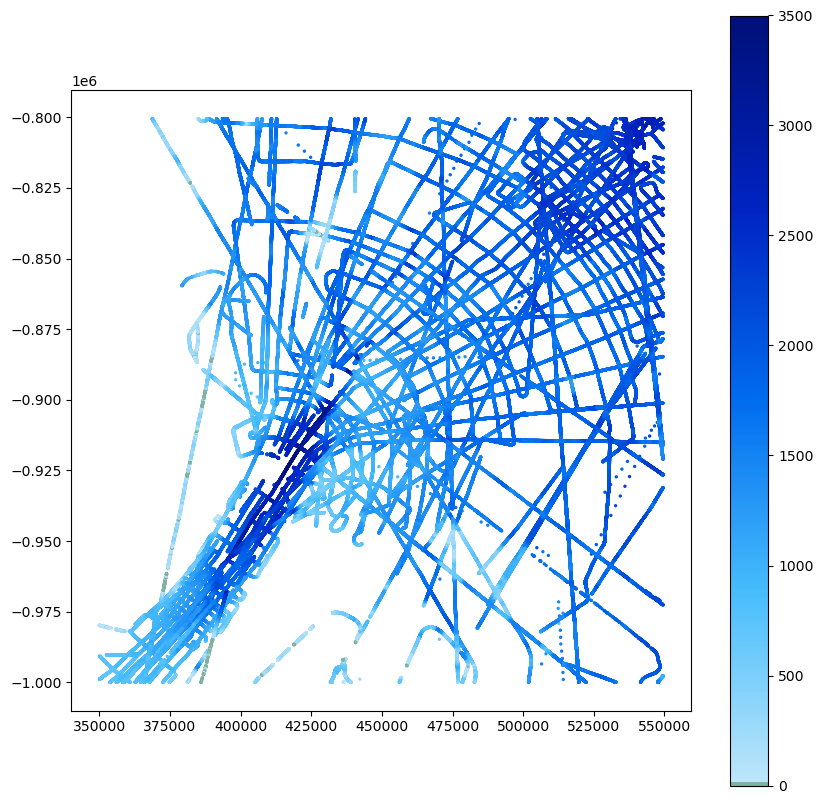

In [9]:
fig, ax = plt.subplots(figsize = (10, 10))

# Plot data points
ax.scatter(byrd_bedmap_points_clean["x"], byrd_bedmap_points_clean["y"], 
           c = byrd_bedmap_points_clean["t"], 
           s = 2,
           cmap = icethickness_cmap, vmin = 0, vmax = 3500)

fig.colorbar(mappable = ax.collections[0], ax = ax)
ax.set_aspect('equal')

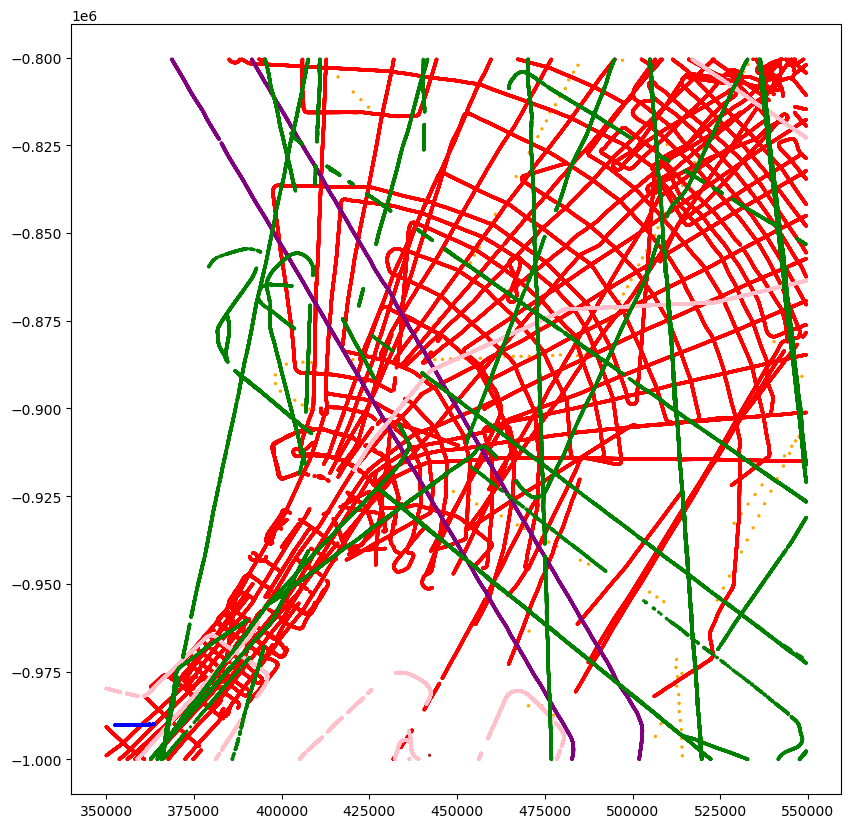

In [10]:
color_dict = {'NASA_2011_ICEBRIDGE_AIR_BM2.csv': 'red', 
              'UTIG_2010_ICECAP_AIR_BM3.csv': 'green', 
              'NASA_2017_ICEBRIDGE_AIR_BM3.csv': 'pink',
              'NASA_2013_ICEBRIDGE_AIR_BM3.csv': 'purple',
              'LDEO_2015_ROSETTA_AIR_BM3.csv': 'blue',
              'BEDMAP1_1966-2000_AIR_BM1.csv': 'orange', # sparse points
              'UTIG_2004_AGASEA_AIR_BM2.csv': 'brown'}

fig, ax = plt.subplots(figsize = (10, 10))

# Plot data points
ax.scatter(byrd_bedmap_points_clean["x"], byrd_bedmap_points_clean["y"], 
           c = [color_dict[category] for category in byrd_bedmap_points_clean["source"]], 
           s = 2)

ax.set_aspect('equal')

# We define the coordinates of our experimental regions

- We write out the polar stereographic coordinates (EPSG:3031) for every square.
- We write the coordinates in kilometer units (* 1000) for easier readability.
- Currently out regions are 25 * 25 km

- subsampling will still keep it irregulaly spaced. Off-grid

In [18]:
### Write data set
corners_real_data_regions = pd.DataFrame([
    {"name": "RegionA", "x_min": 425 * 1000, "x_max": 450 * 1000, "y_min": -875 * 1000, "y_max": -850 * 1000, "coord_units": "EPSG:3031"},
    {"name": "RegionB", "x_min": 450 * 1000, "x_max": 475 * 1000, "y_min": -875 * 1000, "y_max": -850 * 1000},
])

corners_real_data_regions.to_csv("data/real_data/corners_real_data_regions.csv", index = False)

### Define broader Byrd region
corners_byrd_regions = pd.DataFrame([
    {"name": "Byrd", "x_min": 400 * 1000, "x_max": 600 * 1000, "y_min": -950 * 1000, "y_max": -750 * 1000, "coord_units": "EPSG:3031"},
])

corners_byrd_regions.to_csv("data/real_data/corners_broader_byrd_region.csv", index = False)

In [ ]:
def load_and_preprocess_ice_velocity_data(file_path):
    """
    Load and preprocess ice velocity data from a NetCDF file.
    
    Inputs:
        file_path (str): Path to the NetCDF file.
        
    Returns:
        xarray.DataArray: Preprocessed ice velocity data.
    """
    # Load the NetCDF file
    # loading works with base(Python 3.8.12)
    ice_vel_all_of_antarctica = xr.open_dataset(file_path)

    # Data file is large so crop to the "broader Byrd region" to reduce memory usage
    corners_byrd_regions = pd.read_csv("data/real_data/corners_broader_byrd_region.csv")

    x_min, x_max, y_min, y_max = corners_byrd_regions.loc[corners_byrd_regions.name == "Byrd", ["x_min", "x_max", "y_min", "y_max"]].values[0]

    ice_vel_byrd = ice_vel_all_of_antarctica.sel(x = slice(x_min, x_max), y = slice(y_max, y_min)) # reverse order
    
    return ice_vel_byrd

file_path = '/home/kim/data/nsidc/antarctica_ice_velocity_450m_v2.nc'
ice_vel_xr = load_and_preprocess_ice_velocity_data(file_path)

In [ ]:
# interpolate ice_vel [VX, VY, ERRX, ERRY] to 1 km grid
ice_vel_xr

<xarray.Dataset>
Dimensions:       (x: 444, y: 445)
Coordinates:
  * x             (x) float64 4.004e+05 4.008e+05 ... 5.993e+05 5.998e+05
  * y             (y) float64 -7.500e+05 -7.505e+05 ... -9.494e+05 -9.498e+05
    lat           (y, x) float64 ...
    lon           (y, x) float64 ...
Data variables:
    coord_system  |S1 ...
    VX            (y, x) float32 ...
    VY            (y, x) float32 ...
    STDX          (y, x) float32 ...
    STDY          (y, x) float32 ...
    ERRX          (y, x) float32 0.4943 0.4836 0.4642 ... 0.6786 0.6217 0.5777
    ERRY          (y, x) float32 ...
    CNT           (y, x) int32 778 795 800 809 804 803 ... 516 504 538 542 529
Attributes: (12/26)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        vel_nsidc.CF16.nc
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing
    product_version:            
    ...                        ...
    spatial_resolution:        450m
    time_coverage_start:       1995-01-01
    time_coverage_end:         2016-12-31
    project:                   NASA/MEaSUREs
    creator_name:              J. Mouginot
    license:                   No restrictions on access or use

In [ ]:
corner_regions = pd.read_csv("data/real_data/corners_real_data_regions.csv")

# contains surface, thickness and bedrock
# here we shave off the first two columns as they are not needed
bedmap_points = pd.read_csv('/home/kim/ice_thickness/data/byrd_bedmap_points_clean.csv').iloc[:, 2:]

surface_velocity = pd.read_csv('/home/kim/ice_thickness/data/surface_velocity.csv')

# for region_name in region_names:
region_names = ["RegionA",]

for region_name in region_names:
    # unpack the region coordinate
    x_min, x_max, y_min, y_max = corner_regions.loc[corner_regions.name == region_name, ["x_min", "x_max", "y_min", "y_max"]].values[0]

    # Step 1: Crop the region
    bedmap_points_region = bedmap_points[
        (bedmap_points["x"] > x_min) & 
        (bedmap_points["x"] < x_max) & 
        (bedmap_points["y"] > y_min) & 
        (bedmap_points["y"] < y_max)]
    
    # Step 2: Retrieve corresponding surface velocity data

In [37]:
bedmap_points

,lon,lat,x,y,s,t,b,b_inferred,source
0,152.985600,-79.762700,506520.230349,-993484.578865,2041.00,1520.00,521.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
1,152.365800,-79.853700,512616.441896,-979120.903634,2002.00,791.00,1211.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
2,152.210800,-79.876400,514104.771891,-975532.137582,1979.00,1347.00,632.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
3,151.231000,-80.001010,524146.514676,-954642.091619,2014.00,1934.00,80.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
4,151.063600,-80.020710,525890.208287,-951219.665584,2012.00,1962.00,50.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
...,...,...,...,...,...,...,...,...,...
457446,158.087397,-80.387113,390665.287173,-971193.080867,164.36,1540.87,-1376.51,False,UTIG_2010_ICECAP_AIR_BM3.csv
457447,158.082357,-80.387541,390733.240051,-971115.277598,159.67,1556.63,-1396.96,False,UTIG_2010_ICECAP_AIR_BM3.csv
457448,158.079456,-80.387789,390772.281387,-971070.325446,157.87,1555.97,-1398.10,False,UTIG_2010_ICECAP_AIR_BM3.csv
457449,158.077312,-80.387972,390801.144492,-971037.131374,162.06,1549.53,-1387.47,False,UTIG_2010_ICECAP_AIR_BM3.csv


In [ ]:
# 25 km / 500 m grid: 50 x 50 grid cells
x_min = 425 * 1000
x_max = 450 * 1000
y_max = -850 * 1000
y_min = -875 * 1000

byrd_bedmap_points_zoom = byrd_bedmap_points_clean[
    (byrd_bedmap_points_clean["x"] > x_min) & 
    (byrd_bedmap_points_clean["x"] < x_max) & 
    (byrd_bedmap_points_clean["y"] > y_min) & 
    (byrd_bedmap_points_clean["y"] < y_max)]

byrd_bedmap_points_zoom

,Unnamed: 0.1,Unnamed: 0,lon,lat,x,y,s,t,b,b_inferred,source
133,133,133,153.044900,-80.987900,444737.975799,-874540.992691,1377.00,1094.00,283.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
14280,22584,22584,153.996933,-81.057316,426819.569892,-874990.925156,1158.35,1227.62,-69.27,False,NASA_2011_ICEBRIDGE_AIR_BM2.csv
14281,22585,22585,153.995645,-81.057497,426830.566448,-874963.551258,1158.84,1229.24,-70.40,False,NASA_2011_ICEBRIDGE_AIR_BM2.csv
14282,22586,22586,153.994362,-81.057676,426841.581477,-874936.411011,1159.40,1230.85,-71.45,False,NASA_2011_ICEBRIDGE_AIR_BM2.csv
14283,22587,22587,153.993079,-81.057856,426852.547585,-874909.172490,1160.03,1232.46,-72.44,False,NASA_2011_ICEBRIDGE_AIR_BM2.csv
...,...,...,...,...,...,...,...,...,...,...,...
435854,444163,444163,152.302348,-81.108623,449901.700176,-857021.793761,1399.52,1681.72,-282.20,False,UTIG_2010_ICECAP_AIR_BM3.csv
435855,444164,444164,152.301718,-81.108453,449919.758972,-857033.295948,1400.44,1671.49,-271.05,False,UTIG_2010_ICECAP_AIR_BM3.csv
435856,444165,444165,152.301089,-81.108283,449937.803119,-857044.805699,1400.90,1669.11,-268.21,False,UTIG_2010_ICECAP_AIR_BM3.csv
435857,444166,444166,152.300460,-81.108113,449955.847575,-857056.315160,1401.87,1670.67,-268.80,False,UTIG_2010_ICECAP_AIR_BM3.csv


In [39]:
byrd_bedmap_points_zoom_subsample = byrd_bedmap_points_zoom[::10]

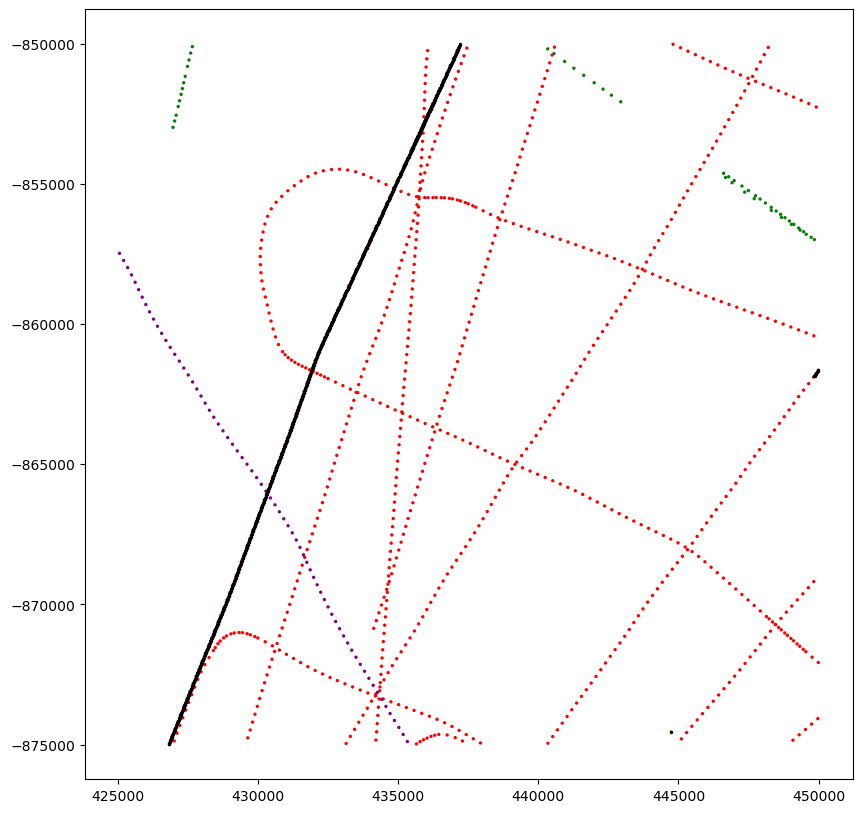

In [40]:
fig, ax = plt.subplots(figsize = (10, 10))


# Plot data points
ax.scatter(byrd_bedmap_points_zoom_subsample["x"], byrd_bedmap_points_zoom_subsample["y"], 
           c = [color_dict[category] for category in byrd_bedmap_points_zoom_subsample["source"]], 
           s = 2)
byrd_bedmap_points_zoom_subset = byrd_bedmap_points_zoom[0:1000]
ax.scatter(byrd_bedmap_points_zoom_subset["x"], byrd_bedmap_points_zoom_subset["y"], color = "black",
           s = 2)

ax.set_aspect('equal')

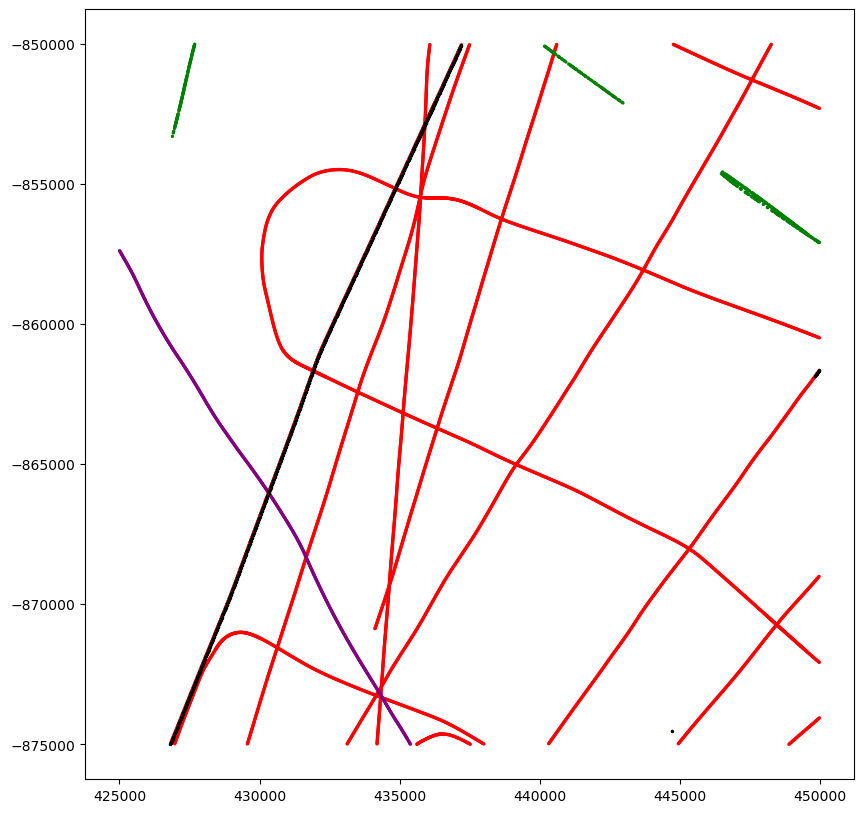

In [34]:
fig, ax = plt.subplots(figsize = (10, 10))


# Plot data points
ax.scatter(byrd_bedmap_points_zoom["x"], byrd_bedmap_points_zoom["y"], 
           c = [color_dict[category] for category in byrd_bedmap_points_zoom["source"]], 
           s = 2)
byrd_bedmap_points_zoom_subset = byrd_bedmap_points_zoom[0:1000]
ax.scatter(byrd_bedmap_points_zoom_subset["x"], byrd_bedmap_points_zoom_subset["y"], color = "black",
           s = 2)

ax.set_aspect('equal')

# Use natural ordering to subsample the frequency & to seperate train and test.
We can use a larger area but more subsampling! Still no gridding needed... 
Try model with x, y, s input too!